In [147]:
m = 2251262568%8 +1
print(m)

1


In [148]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("thedevastator/240000-household-electricity-consumption-records")

# print("Path to dataset files:", path)

In [149]:
import pandas as pd

df = pd.read_csv("/root/.cache/kagglehub/datasets/thedevastator/240000-household-electricity-consumption-records/versions/1/household_power_consumption.csv")
df

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
260635,260635,30/6/2007,23:55:00,2.88,0.36,239.01,12,0,0,18.0
260636,260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0,0,17.0
260637,260637,30/6/2007,23:57:00,2.882,0.28,239.05,12,0,0,18.0
260638,260638,30/6/2007,23:58:00,2.66,0.29,238.98,11.2,0,0,18.0


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260640 entries, 0 to 260639
Data columns (total 10 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   index                  260640 non-null  int64  
 1   Date                   260640 non-null  object 
 2   Time                   260640 non-null  object 
 3   Global_active_power    260640 non-null  object 
 4   Global_reactive_power  260640 non-null  object 
 5   Voltage                260640 non-null  object 
 6   Global_intensity       260640 non-null  object 
 7   Sub_metering_1         260640 non-null  object 
 8   Sub_metering_2         260640 non-null  object 
 9   Sub_metering_3         256869 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 19.9+ MB


In [151]:
df.isnull().sum()

,0
index,0
Date,0
Time,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,3771


In [152]:
# df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%y %H:%M:%S', errors='coerce')
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')
df

<ipython-input-152-dc368b357120>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], errors='coerce')


,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,0,1/1/07,0:00:00,2.58,0.136,241.97,10.6,0,0,0.0,2007-01-01 00:00:00
1,1,1/1/07,0:01:00,2.552,0.1,241.75,10.4,0,0,0.0,2007-01-01 00:01:00
2,2,1/1/07,0:02:00,2.55,0.1,241.64,10.4,0,0,0.0,2007-01-01 00:02:00
3,3,1/1/07,0:03:00,2.55,0.1,241.71,10.4,0,0,0.0,2007-01-01 00:03:00
4,4,1/1/07,0:04:00,2.554,0.1,241.98,10.4,0,0,0.0,2007-01-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...
260635,260635,30/6/2007,23:55:00,2.88,0.36,239.01,12,0,0,18.0,2007-06-30 23:55:00
260636,260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0,0,17.0,2007-06-30 23:56:00
260637,260637,30/6/2007,23:57:00,2.882,0.28,239.05,12,0,0,18.0,2007-06-30 23:57:00
260638,260638,30/6/2007,23:58:00,2.66,0.29,238.98,11.2,0,0,18.0,2007-06-30 23:58:00


In [153]:
cols_to_convert = ['Global_active_power', 'Global_reactive_power', 'Voltage',
                   'Global_intensity', 'Sub_metering_1', 'Sub_metering_2']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df

,index,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,0,1/1/07,0:00:00,2.580,0.136,241.97,10.6,0.0,0.0,0.0,2007-01-01 00:00:00
1,1,1/1/07,0:01:00,2.552,0.100,241.75,10.4,0.0,0.0,0.0,2007-01-01 00:01:00
2,2,1/1/07,0:02:00,2.550,0.100,241.64,10.4,0.0,0.0,0.0,2007-01-01 00:02:00
3,3,1/1/07,0:03:00,2.550,0.100,241.71,10.4,0.0,0.0,0.0,2007-01-01 00:03:00
4,4,1/1/07,0:04:00,2.554,0.100,241.98,10.4,0.0,0.0,0.0,2007-01-01 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...
260635,260635,30/6/2007,23:55:00,2.880,0.360,239.01,12.0,0.0,0.0,18.0,2007-06-30 23:55:00
260636,260636,30/6/2007,23:56:00,2.892,0.358,238.86,12.2,0.0,0.0,17.0,2007-06-30 23:56:00
260637,260637,30/6/2007,23:57:00,2.882,0.280,239.05,12.0,0.0,0.0,18.0,2007-06-30 23:57:00
260638,260638,30/6/2007,23:58:00,2.660,0.290,238.98,11.2,0.0,0.0,18.0,2007-06-30 23:58:00


In [154]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')


In [155]:
df.isnull().sum()

,0
index,0
Date,0
Time,0
Global_active_power,3771
Global_reactive_power,3771
Voltage,3771
Global_intensity,3771
Sub_metering_1,3771
Sub_metering_2,3771
Sub_metering_3,3771


In [156]:
# df = df.dropna(inplace = True)
df = df.dropna()

In [157]:
df = df.set_index('Datetime')


In [158]:
df_hourly = df['Global_active_power'].resample('1h').mean()


In [159]:
df_hourly.isnull().sum()

np.int64(3877)

In [160]:
df_hourly = df_hourly.dropna()

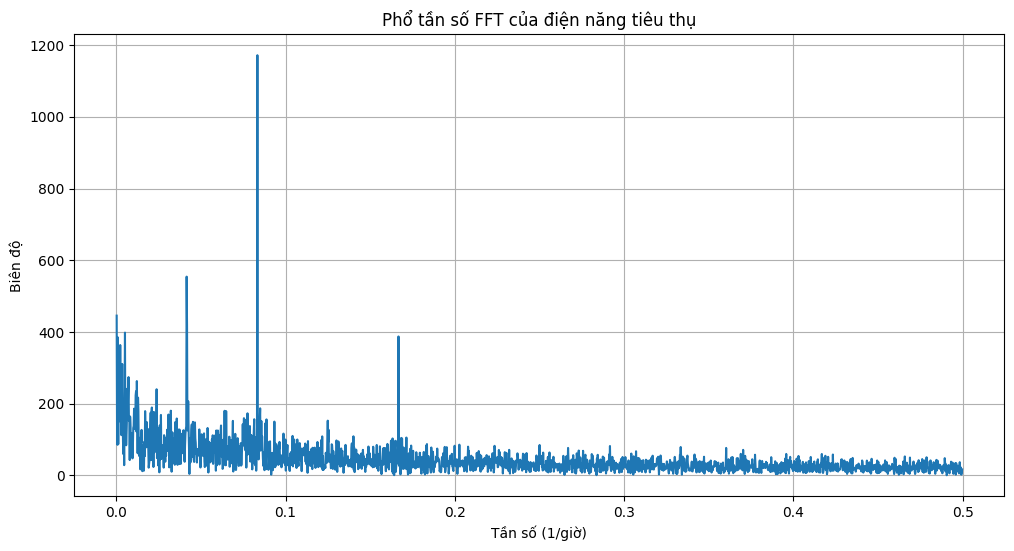

Chu kỳ chiếm ưu thế: 12.00 giờ (~0.50 ngày)


In [161]:
# Chuẩn bị dữ liệu cho FFT
y = df_hourly.values
n = len(y)
timestep = 1  # mỗi điểm cách nhau 1 giờ

# FFT
yf = fft(y)
xf = fftfreq(n, d=timestep)

# Chỉ lấy phần phổ dương
xf = xf[1:n//2]
yf = np.abs(yf[1:n//2])

# Vẽ phổ tần số
plt.figure(figsize=(12, 6))
plt.plot(xf, yf)
plt.title("Phổ tần số FFT của điện năng tiêu thụ")
plt.xlabel("Tần số (1/giờ)")
plt.ylabel("Biên độ")
plt.grid()
plt.show()

# Xác định chu kỳ tiêu thụ chiếm ưu thế
peak_freq = xf[np.argmax(yf)]
dominant_period_hours = 1 / peak_freq
print(f"Chu kỳ chiếm ưu thế: {dominant_period_hours:.2f} giờ (~{dominant_period_hours/24:.2f} ngày)")


In [162]:
df['Global_active_power'] = pd.to_numeric(df['Global_active_power'], errors='coerce')
df = df[['Global_active_power']].resample('1h').mean()

In [165]:

df['hour'] = df.index.hour
daily_hourly_mean = df.groupby('hour').mean()  # Trung bình từng giờ trong ngày


In [167]:
# Chọn dữ liệu huấn luyện: toàn bộ dữ liệu trừ ngày cuối cùng
from statsmodels.tsa.ar_model import AutoReg
import numpy as np # Import numpy

# df = df.dropna()

last_day = df.index.date[-1]

train_df = df[df.index.date < last_day]
test_df = df[df.index.date == last_day]

train = train_df['Global_active_power']

test_hours = test_df.index

train = train.dropna()
if len(train) <= 24:
    print("Warning: Not enough data points in 'train' for the specified lag (24).")
    print(f"Length of train data: {len(train)}")
else:

    model = AutoReg(train, lags=24, old_names=False).fit()
    start_pred = len(train)

    end_pred = len(train) + len(test_hours) - 1

    predictions = model.predict(start=start_pred, end=end_pred)

    # Ensure the length of predictions matches the length of test_hours before assigning index
    if len(predictions) == len(test_hours):
        predictions.index = test_hours  # Gán index đúng giờ dự đoán
        print("Predictions generated successfully.")
    else:
        print("Error: Length of predictions does not match the length of test_hours.")
        print(f"Length of predictions: {len(predictions)}")
        print(f"Length of test_hours: {len(test_hours)}")

Predictions generated successfully.


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the po

In [168]:
predicted_peak_hour = predictions.idxmax().hour
print(f" Dự đoán giờ tiêu thụ điện cao nhất trong ngày cuối: {predicted_peak_hour}:00")

# Giờ tiêu thụ cao nhất thực tế ngày cuối
actual_peak_hour = df.loc[test_hours]['Global_active_power'].idxmax().hour
print(f" Thực tế giờ tiêu thụ điện cao nhất: {actual_peak_hour}:00")


⏰ Dự đoán giờ tiêu thụ điện cao nhất trong ngày cuối: 20:00
✅ Thực tế giờ tiêu thụ điện cao nhất: 18:00


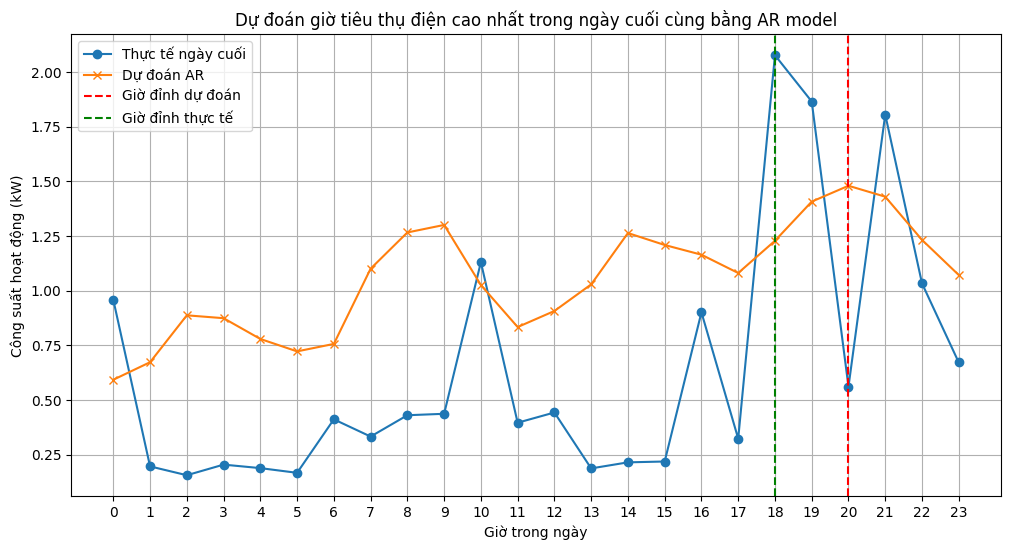

In [169]:
plt.figure(figsize=(12,6))
plt.plot(df.loc[test_hours].index.hour, df.loc[test_hours]['Global_active_power'], label='Thực tế ngày cuối', marker='o')
plt.plot(predictions.index.hour, predictions.values, label='Dự đoán AR', marker='x')
plt.axvline(predicted_peak_hour, color='red', linestyle='--', label='Giờ đỉnh dự đoán')
plt.axvline(actual_peak_hour, color='green', linestyle='--', label='Giờ đỉnh thực tế')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Công suất hoạt động (kW)')
plt.title('Dự đoán giờ tiêu thụ điện cao nhất trong ngày cuối cùng bằng AR model')
plt.legend()
plt.grid(True)
plt.xticks(range(24))
plt.show()


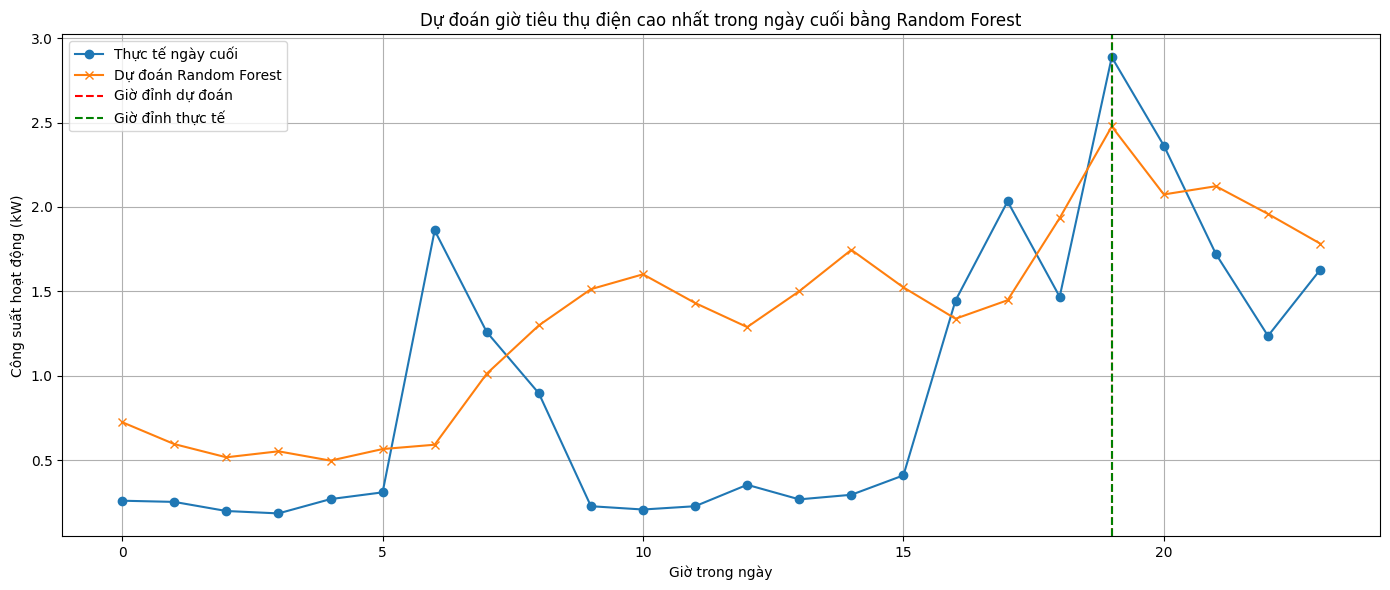

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Giả định df đã được load và datetime đã xử lý
# Tạo cột datetime
df['datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['datetime'])  # bỏ dòng lỗi datetime
df.set_index('datetime', inplace=True)

# Đảm bảo numeric
for col in ['Global_active_power']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Resample theo giờ
df_hourly = df['Global_active_power'].resample('1h').mean().dropna()

# Tạo đặc trưng: ngày, giờ
df_hourly = df_hourly.to_frame(name='power')
df_hourly['hour'] = df_hourly.index.hour
df_hourly['day'] = df_hourly.index.date
df_hourly['dayofweek'] = df_hourly.index.dayofweek
df_hourly['is_weekend'] = (df_hourly['dayofweek'] >= 5).astype(int)

# Gộp thành từng ngày để dự đoán
X = []
y = []

# Tạo tập dữ liệu theo từng giờ trong mỗi ngày
days = df_hourly['day'].unique()
for d in days:
    day_data = df_hourly[df_hourly['day'] == d]
    if len(day_data) == 24:  # đủ 24 giờ
        features = day_data[['hour', 'dayofweek', 'is_weekend']].values
        target = day_data['power'].values
        X.append(features)
        y.append(target)

X = np.array(X)  # (n_days, 24, 3)
y = np.array(y)  # (n_days, 24)

# Dùng 1000 ngày gần nhất
X_train = X[-5000:-1].reshape(-1, 3)  # bỏ ngày cuối để test
y_train = y[-5000:-1].flatten()

# Dữ liệu ngày cuối
X_test = X[-1]
y_test = y[-1]

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Dự đoán ngày cuối
y_pred = model.predict(X_test)

# Giờ đỉnh
peak_hour_pred = np.argmax(y_pred)
peak_hour_real = np.argmax(y_test)

# Biểu đồ
plt.figure(figsize=(14, 6))
plt.plot(range(24), y_test, label='Thực tế ngày cuối', marker='o')
plt.plot(range(24), y_pred, label='Dự đoán Random Forest', marker='x')
plt.axvline(peak_hour_pred, color='red', linestyle='--', label='Giờ đỉnh dự đoán')
plt.axvline(peak_hour_real, color='green', linestyle='--', label='Giờ đỉnh thực tế')
plt.title('Dự đoán giờ tiêu thụ điện cao nhất trong ngày cuối bằng Random Forest')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Công suất hoạt động (kW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


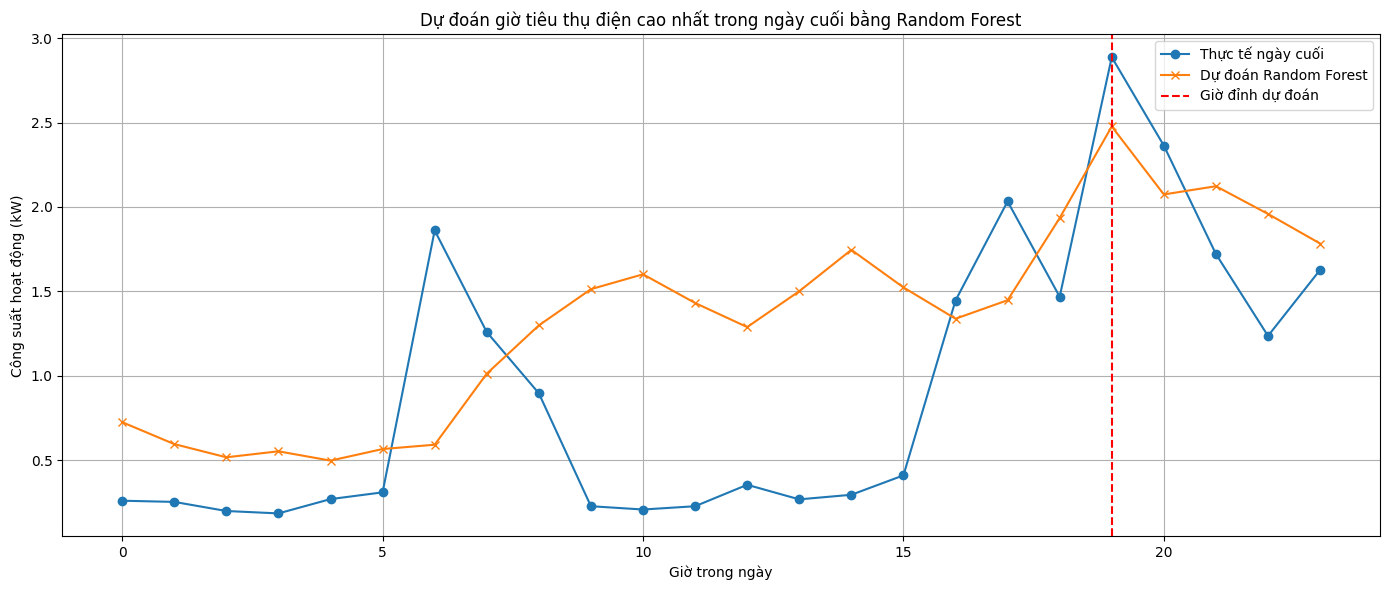

In [187]:
plt.figure(figsize=(14, 6))
plt.plot(range(24), y_test, label='Thực tế ngày cuối', marker='o')
plt.plot(range(24), y_pred, label='Dự đoán Random Forest', marker='x')
plt.axvline(peak_hour_pred, color='red', linestyle='--', label='Giờ đỉnh dự đoán')
# plt.axvline(peak_hour_real, color='green', linestyle='--', label='Giờ đỉnh thực tế')
plt.title('Dự đoán giờ tiêu thụ điện cao nhất trong ngày cuối bằng Random Forest')
plt.xlabel('Giờ trong ngày')
plt.ylabel('Công suất hoạt động (kW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [185]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Đánh giá mô hình Random Forest cho ngày cuối cùng:")
print(f"- MAE : {mae:.4f} kW")
print(f"- MSE : {mse:.4f} kW²")
print(f"- RMSE: {rmse:.4f} kW")
print(f"- R²   : {r2:.4f}")


Đánh giá mô hình Random Forest cho ngày cuối cùng:
- MAE : 0.6522 kW
- MSE : 0.6182 kW²
- RMSE: 0.7863 kW
- R²   : 0.0496
